## 1. Setup and Preprocessing

In [ ]:
!nvidia-smi

Mon May  3 02:49:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from google.colab import drive

In [ ]:
# drive.mount('/content/gdrive')

In [ ]:
# !wget --no-check-certificate https://www.dropbox.com/s/j8w8uo7y2uqxo7o/data.csv
!wget --no-check-certificate https://www.dropbox.com/s/owz4fdu830okkry/data_2.csv


--2021-05-03 02:49:28--  https://www.dropbox.com/s/owz4fdu830okkry/data_2.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/owz4fdu830okkry/data_2.csv [following]
--2021-05-03 02:49:29--  https://www.dropbox.com/s/raw/owz4fdu830okkry/data_2.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc87dad089987dee03acde81e566.dl.dropboxusercontent.com/cd/0/inline/BNy0T4owSKLkn7q9Viq64yHWWoJnAU5OtLZ-9sddi1htU4k0LC2lNnrwSzs0iaOKPpE3eSodCWWZekF2n8cNh-DA5vOR-15kBPUp0iI4UADf1VgR6iIC1mHHqFFTLmT9qjlpWAqSFSC-NBgmXjkLylS4/file# [following]
--2021-05-03 02:49:29--  https://uc87dad089987dee03acde81e566.dl.dropboxusercontent.com/cd/0/inline/BNy0T4owSKLkn7q9Viq64yHWWoJnAU5OtLZ-9sddi1htU4k0LC2lNnrwSzs0iaOKPpE3eSodCWWZekF2n8cNh-DA5vOR-15k

In [ ]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt



##Load data

In [ ]:
# data_df = pd.read_csv('data.csv')
data_df = pd.read_csv('data_2.csv')

In [ ]:
# Show the top 5 rows
display(data_df.head())
# Summarize the data

data_df.Type.value_counts()

Sentence    Type  Label
0        ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น   แง่ลบ      1
1            ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา   แง่ลบ      1
2                   ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้   แง่ลบ      1
3  ก็แค่โสดไม่ได้อ่อยแค่โสดนานหน่อยไม่ได้อ่อยจริง...   แง่ลบ      1
4  กฎของกระจกคือการสะท้อนกลับมาแต่กฎของเวลาคือการ...  ข้อคิด      2

แง่บวก    995
ข้อคิด    709
แง่ลบ     598
Name: Type, dtype: int64

In [ ]:
data_df.shape


(2302, 3)

##Data cleaning

In [ ]:
display(data_df.Type.unique())

array(['แง่ลบ', 'ข้อคิด', 'แง่บวก'], dtype=object)

In [ ]:
data_df_quote = data_df[["Sentence", "Type"]]
data_df_quote.columns = ['Sentence', 'Type']
display(data_df_quote.describe())
display(data_df_quote.Type.unique())



Sentence    Type
count                                        2302    2302
unique                                       2298       3
top     ที่รักกับที่พักมันมีเส้นบางบางกั้นกันอยู่  แง่บวก
freq                                            2     995

array(['แง่ลบ', 'ข้อคิด', 'แง่บวก'], dtype=object)

In [ ]:
data_df_quote['Clean_Type']=data_df_quote['Type'].str.lower().copy()
display(data_df_quote.describe())
display(data_df_quote.Type.unique())

Sentence    Type Clean_Type
count                                        2302    2302       2302
unique                                       2298       3          3
top     ที่รักกับที่พักมันมีเส้นบางบางกั้นกันอยู่  แง่บวก     แง่บวก
freq                                            2     995        995

array(['แง่ลบ', 'ข้อคิด', 'แง่บวก'], dtype=object)

In [ ]:
data_df_quote['Type']=data_df_quote['Clean_Type'].str.lower().copy()
data_df_quote.drop('Clean_Type', axis=1, inplace=True)
display(data_df_quote.describe())

Sentence    Type
count                                        2302    2302
unique                                       2298       3
top     ที่รักกับที่พักมันมีเส้นบางบางกั้นกันอยู่  แง่บวก
freq                                            2     995

In [ ]:
data_df_quote = data_df_quote.drop_duplicates("Sentence", keep="first")
display(data_df_quote.describe())

Sentence    Type
count                        2298    2298
unique                       2298       3
top     คนช้าชิดซ้ายควายช้าชิดขวา  แง่บวก
freq                            1     995

In [ ]:
qoute_label = np.array(data_df_quote["Type"])

In [ ]:
!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf

--2021-05-03 02:49:30--  https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
Resolving awards.opdc.go.th (awards.opdc.go.th)... 164.115.76.22
Connecting to awards.opdc.go.th (awards.opdc.go.th)|164.115.76.22|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2021-05-03 02:50:23 ERROR 500: Internal Server Error.



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install pythainlp
!pip install marisa_trie
!pip install PyICU

     |████████████████████████████████| 11.0MB 15.3MB/s 
     |████████████████████████████████| 747kB 58.0MB/s 
     |████████████████████████████████| 276kB 18.2MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-linux_x86_64.whl size=861649 sha256=6d42febb5400a3c3dd19bba6366ef2df5b1807ceb3d3a494b261eebcf3b08814
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie
     |████████████████████████████████| 296kB 19.3MB/s 
  Created wheel for PyICU: filename=PyICU-2.7.2-cp37-cp37m-linux_x86_64.whl size=1341068 sha256=982ce5ff1ebe5af507c0507b5457a65a9e3e2355f1a39f04e614171784e7245a
  Stored in directory: /root/.cache/pip/wheels/76/d5/80/bb5bb9071021eff7241fc700124c0af4caadccf2db23e8dcee
Successfully built PyICU


In [ ]:
sentences = []
n=0
chars = dict()
reverse_chars = dict()

chars[' '] = 0

reverse_chars[0]=' '

dictionary = dict()
re_dictionary = dict()

for sentence in data_df_quote["Sentence"]:
  split1 = sentence.split()
  if n < 2:
    print(sentence)
    print(split1)
    n+=1
  for c in sentence:
    if chars.get(c) == None:
      chars[c] = len(chars)
      reverse_chars[len(reverse_chars)] = c
   

  sentences.append(split1)


ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น
['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น']
ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา
['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา']


In [ ]:
from pythainlp.tokenize import Tokenizer
from pythainlp.corpus.common import thai_words
import marisa_trie

custom_words_list = set(thai_words())
custom_words_list.add('<PHONE_NUMBER_REMOVED>')
trie = marisa_trie.Trie(custom_words_list)

_tokenizer4 = Tokenizer(custom_dict=trie,engine="newmm")
# _tokenizer4 = Tokenizer(engine="icu")

In [ ]:
token_sentences =[]
for sentence in sentences:
  tmp = []
  for token in sentence:
    tokens = _tokenizer4.word_tokenize(token)
    tmp.extend(tokens)
    for w in tokens:
      if dictionary.get(w) == None:
        dictionary[w] = len(dictionary)
        re_dictionary[len(re_dictionary)] = w
  token_sentences.append(tmp)
dictionary['<PAD>'] = len(dictionary)
re_dictionary[len(re_dictionary)] = '<PAD>'
dictionary['</s>'] = len(dictionary)
re_dictionary[len(re_dictionary)] = '</s>'


In [ ]:
len(dictionary)

3452

['ข้อคิด' 'แง่บวก' 'แง่ลบ']


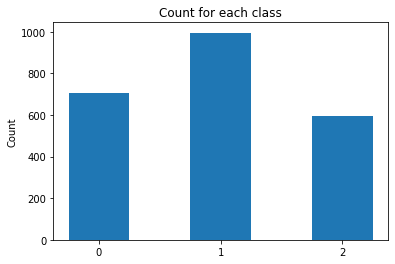

In [ ]:
def plot(label, count):
    fig, ax = plt.subplots()
    ind = np.arange(len(count))
    rects1 = ax.bar(ind, count, 0.5)

    ax.set_ylabel('Count')
    ax.set_title('Count for each class')
    ax.set_xticks(ind)
    print(label)
    # ax.set_xticklabels(label)
    plt.show()
    
label, count = np.unique(qoute_label, return_counts=True)
plot(label, count)


## 2. Prepare Data

In [ ]:
data_quote = data_df_quote.to_numpy()

unique_label = data_df_quote.Type.unique()

label_2_num_map = dict(zip(unique_label, range(len(unique_label))))
num_2_label_map = dict(zip(range(len(unique_label)), unique_label))

print("Create Mappings")
display(num_2_label_map)
display(label_2_num_map)

print("Before Mappings")
display(data_quote[:, 1])
data_quote[:,1] = np.vectorize(label_2_num_map.get)(data_quote[:,1])

print("After Mappings")
display(data_quote[:, 1])

Create Mappings


{0: 'แง่ลบ', 1: 'ข้อคิด', 2: 'แง่บวก'}

{'ข้อคิด': 1, 'แง่บวก': 2, 'แง่ลบ': 0}

Before Mappings


array(['แง่ลบ', 'แง่ลบ', 'แง่ลบ', ..., 'ข้อคิด', 'ข้อคิด', 'แง่บวก'],
      dtype=object)

After Mappings


array([0, 0, 0, ..., 1, 1, 2], dtype=object)

In [ ]:
def strip_str(string):
    return string.strip()
     
# Trim of extra begining and trailing whitespace in the string
print("Before")
print(data_quote)
data_quote[:,0] = np.vectorize(strip_str)(data_quote[:,0])
print("After")
print(data_quote)

Before
[['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น' 0]
 ['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา' 0]
 ['ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้' 0]
 ...
 ['THEBIGเงินไม่ได้อยู่ในการซื้อและการขายแต่รออยู่' 1]
 ['Tomorrowisanotherdayยังไงก็ยังมีวันพรุ่งนี้ให้แก้ตัวเสมอ' 1]
 ['UVไม่ดีต่อตาแต่ถ้าyouมองมามันดีต่อใจ' 2]]
After
[['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น' 0]
 ['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา' 0]
 ['ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้' 0]
 ...
 ['THEBIGเงินไม่ได้อยู่ในการซื้อและการขายแต่รออยู่' 1]
 ['Tomorrowisanotherdayยังไงก็ยังมีวันพรุ่งนี้ให้แก้ตัวเสมอ' 1]
 ['UVไม่ดีต่อตาแต่ถ้าyouมองมามันดีต่อใจ' 2]]


In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
def data_split(sentences):
    texts = []
    labels = []
    for sentence,label in sentences:
      texts.append(sentence)
      labels.append(label)
    return texts, labels

train_texts = data_quote
train_texts_label_0 = [s for s,l in train_texts if l == 0]
train_texts_label_1 = [s for s,l in train_texts if l == 1]
train_texts_label_2 = [s for s,l in train_texts if l == 2]

In [ ]:
print("Unique label is {}, nb. of train data = {}".format(np.unique(num_2_label_map), len(train_texts)))
for i in range(5):
  print("Data = {}".format(train_texts[i]))

Unique label is [{0: 'แง่ลบ', 1: 'ข้อคิด', 2: 'แง่บวก'}], nb. of train data = 2298
Data = ['ก็คุณเองไม่ใช่หรอที่ทำให้เราเสียใจในวันนั้น' 0]
Data = ['ก็แค่คนที่เคยทำให้เธอยิ้มในเวลาไม่มีเขา' 0]
Data = ['ก็แค่เด็กขี้แยไม่ต้องมาแคร์ก็ได้' 0]
Data = ['ก็แค่โสดไม่ได้อ่อยแค่โสดนานหน่อยไม่ได้อ่อยจริงจริง' 0]
Data = ['กฎของกระจกคือการสะท้อนกลับมาแต่กฎของเวลาคือการไม่ย้อนกลับไป' 1]


In [ ]:
(train_texts[0,1])

0

In [ ]:
train_data =[]
for sentence in train_texts[:,0]:
  tmp = []
  tokens = _tokenizer4.word_tokenize(sentence)
  tmp.extend(tokens)
  tmp.append('</s>')
  train_data.append(tmp)
tm = [len(qoute) for qoute in train_data]
max_length = max(tm)
mean_length = round(sum(tm)/(len(tm)+1))
print("Max len = ",max_length)
print("Mean len = ",mean_length)

Max len =  45
Mean len =  13


In [ ]:
print(train_data)

[['ก็', 'คุณ', 'เอง', 'ไม่', 'ใช่', 'หรอ', 'ที่', 'ทำให้', 'เรา', 'เสียใจ', 'ใน', 'วันนั้น', '</s>'], ['ก็', 'แค่', 'คน', 'ที่', 'เคย', 'ทำให้', 'เธอ', 'ยิ้ม', 'ใน', 'เวลา', 'ไม่', 'มี', 'เขา', '</s>'], ['ก็', 'แค่', 'เด็ก', 'ขี้แย', 'ไม่ต้อง', 'มา', 'แคร์', 'ก็ได้', '</s>'], ['ก็', 'แค่', 'โสด', 'ไม่', 'ได้', 'อ่อย', 'แค่', 'โสด', 'นาน', 'หน่อย', 'ไม่', 'ได้', 'อ่อย', 'จริง', 'จริง', '</s>'], ['กฎ', 'ของ', 'กระจก', 'คือ', 'การ', 'สะท้อน', 'กลับมา', 'แต่', 'กฎ', 'ของ', 'เวลา', 'คือ', 'การ', 'ไม่', 'ย้อนกลับ', 'ไป', '</s>'], ['กฎ', 'ของ', 'การ', 'เดิน', 'ไป', 'ข้างหน้า', 'คือ', 'ห้าม', 'เสียดาย', 'กับ', 'สิ่ง', 'ที่ผ่านมา', '</s>'], ['กฎ', 'ข้อ', 'ที่หนึ่ง', 'จง', 'อย่า', 'เป็น', 'ตัวเลือก', 'ที่สอง', 'ของ', 'ใคร', '</s>'], ['กฎ', 'ข้อ', 'ที่หนึ่ง', 'อย่า', 'พา', 'ตัวเอง', 'กลับ', 'ไป', 'ใน', 'ที่', 'ที่', 'เคย', 'ออกมา', '</s>'], ['กด', 'ไลค์', 'ให้', 'บ่อย', 'จัง', 'กด', 'เงิน', 'ให้', 'บ้าง', '</s>'], ['ก็', 'เธอ', 'มัน', 'น่ารัก', 'โปรด', 'อย่า', 'มา', 'ยึกยัก', 'เรื่อง', 'รัก', 'รั

In [ ]:
def tmp_data_gen(sentence):
  tmp_data = []
  for s in train_data:
    for w in s:
      tmp_data.append(w)
  return tmp_data
tmp_data_0 = tmp_data_gen(train_texts_label_0)


In [ ]:
len(tmp_data_0)

30383

In [ ]:
# def preprocess(text):
#   step = 1
#   sentences = []
#   next_chars = []
  
#   for i in range(0, len(text) - mean_length, step):
#       sentences.append(text[i: i + mean_length])
#       next_chars.append(text[i + mean_length])
#   x = np.zeros((len(sentences), mean_length, len(dictionary)), dtype=np.bool)
#   y = np.zeros((len(sentences), len(dictionary)), dtype=np.bool)
#   for i, sentence in enumerate(sentences):
#       for t, char in enumerate(sentence):
#           x[i, t, dictionary[char]] = 1
#       y[i, dictionary[next_chars[i]]] = 1
#   return x,y

def preprocess(text):
  step = 1
  sentences = []
  next_chars = []
  
  for i in range(0, len(text) - mean_length, step):
      sentences.append(text[i: i + mean_length])
      next_chars.append(text[i + mean_length])
  x = np.zeros((len(sentences), mean_length), dtype=np.int32)
  y = np.zeros(len(sentences), dtype=np.int32)
  for i, sentence in enumerate(sentences):
      for t, char in enumerate(sentence):
          x[i, t] = dictionary[char]
      y[i] =dictionary[next_chars[i]] 
  return x,y

In [ ]:
x_train_0,y_train_0 = preprocess(tmp_data_0)

In [ ]:
print(x_train_0.shape,y_train_0.shape)


(30370, 13) (30370,)


In [ ]:
y_train_0[2]

13

In [ ]:
!pip install tf2crf

     |████████████████████████████████| 706kB 27.2MB/s 


In [ ]:
from pythainlp import word_vector

word_embedding = word_vector.get_model()
word_embed = dict()
for word in word_embedding.vocab:
  word_embed[word] = word_embedding[word]
word_embed['UNK'] = np.zeros(300,dtype='float32')

Corpus: thai2fit_wv
- Downloading: thai2fit_wv 0.1


100%|██████████| 62452646/62452646 [00:00<00:00, 93536388.75it/s]


In [ ]:
embedding_matrix = np.zeros((len(dictionary)+1, 300))
for word,i in dictionary.items():
  if type(word_embed.get(word)) == type(None):
    embedding_vector = word_embed['UNK']
  else:
    embedding_vector = word_embed[word]
  if embedding_vector is not None:
      # words not found in embedding index will be all-zeros.
      embedding_matrix[i] = embedding_vector

In [ ]:
print(i)
print((embedding_matrix).shape)
print(word)

3451
(3453, 300)
</s>


In [ ]:
vocab_size, emdedding_size = embedding_matrix.shape

In [ ]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Activation,Embedding,Dropout,Flatten,Bidirectional
from keras.layers import LSTM,GRU
from keras.optimizers import RMSprop,Adam
from keras.callbacks import LambdaCallback
from tf2crf import CRF, ModelWithCRFLoss
import random
import sys

# model = Sequential()

# model.add(LSTM(128, input_shape=(max_length, len(dictionary))))
# model.add(Dense(len(dictionary)))
# model.add(Activation('softmax'))
# optimizer = RMSprop(lr=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer)

model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, 
#                     weights=[embedding_matrix]))
# model.add(Bidirectional(LSTM(units=emdedding_size, activation="relu")))
# model.add(Dropout(0.2))
# model.add(Dense(units=vocab_size, activation='softmax'))
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(units=emdedding_size)))
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=vocab_size))
model.add(Activation('softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])
# inputs = Input(shape=(x_train_0.shape[1],x_train_0.shape[2],), dtype='int32')
# # output = (Embedding(len(dictionary)+1, 64, input_length=x_train_0.shape[1],trainable=True, mask_zero=True))(inputs)
# output = Bidirectional(GRU(64, return_sequences=True))(inputs)
# output = Dropout(0.2)(output)
# output = Dense(len(dictionary), activation="softmax")(output)
# crf = CRF(dtype='float32')
# output = crf(output)
# base_model = Model(inputs, output)
# model = ModelWithCRFLoss(base_model)
# model.compile(optimizer=Adam(lr=0.001),  loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         1035900   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               1442400   
_________________________________________________________________
dense (Dense)                (None, 1024)              615424    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3453)              3539325   
_________________________________________________________________
activation (Activation)      (None, 3453)              0         
Total params: 6,633,049
Trainable params: 5,597,149
Non-trainable params: 1,035,900
______________________________________

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(tmp_data_0) - max_length - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = tmp_data_0[start_index: start_index + max_length]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, max_length, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, chars[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = reverse_chars[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
y_train_0

array([   0,   12,   13, ...,  350,   90, 3451], dtype=int32)

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',
                             verbose=1, save_best_only=True,
                             mode='min')

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.0001)
callbacks = [checkpoint, reduce_lr]

In [ ]:
y_count = {}
for y in y_train_0:
  if y not in y_count:
    y_count[y] = 1
  else:
    y_count[y] += 1

In [ ]:
y_not_unique = []
for y in y_count:
  if y_count[y] > 1:
    y_not_unique.append(y)

In [ ]:
x_train_mul = []
y_train_mul = []
x_train_u = []
y_train_u = []
for i in range(len(y_train_0)):
  if y_train_0[i] in y_not_unique:
    x_train_mul.append(x_train_0[i])
    y_train_mul.append(y_train_0[i])
  else:
    x_train_u.append(x_train_0[i])
    y_train_u.append(y_train_0[i])

In [ ]:
len(x_train_u)

1726

In [ ]:
len(y_train_mul)

28644

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train_mul, y_train_mul, test_size=0.2, random_state=42,stratify=y_train_mul)

In [ ]:
x_train.extend(x_train_u)
y_train.extend(y_train_u)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
batch_size = 64 # minibatch size
num_epochs = 20 # number of epochs

history = model.fit(x_train,y_train, batch_size=256, epochs=num_epochs,verbose=1,validation_data=(x_val, y_val),callbacks=callbacks)

Epoch 1/20
97/97 [==============================] - 36s 28ms/step - loss: 6.8095 - accuracy: 0.0545 - val_loss: 5.8026 - val_accuracy: 0.1023

Epoch 00001: val_loss improved from inf to 5.80264, saving model to weights.hdf5
Epoch 2/20
97/97 [==============================] - 2s 17ms/step - loss: 6.0581 - accuracy: 0.0961 - val_loss: 5.4750 - val_accuracy: 0.1243

Epoch 00002: val_loss improved from 5.80264 to 5.47503, saving model to weights.hdf5
Epoch 3/20
97/97 [==============================] - 2s 17ms/step - loss: 5.6295 - accuracy: 0.1234 - val_loss: 5.2859 - val_accuracy: 0.1381

Epoch 00003: val_loss improved from 5.47503 to 5.28594, saving model to weights.hdf5
Epoch 4/20
97/97 [==============================] - 2s 17ms/step - loss: 5.1870 - accuracy: 0.1436 - val_loss: 5.1835 - val_accuracy: 0.1471

Epoch 00004: val_loss improved from 5.28594 to 5.18352, saving model to weights.hdf5
Epoch 5/20
97/97 [==============================] - 2s 17ms/step - loss: 4.6475 - accuracy: 0.1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


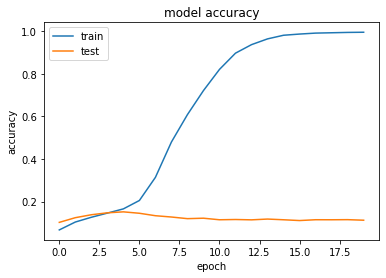

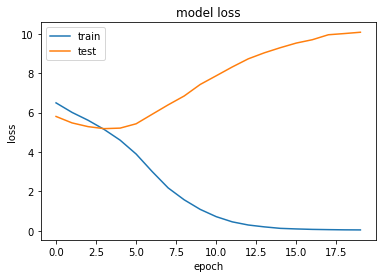

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights("weights.hdf5")

In [ ]:
x_pred = np.zeros(( mean_length, len(dictionary)))
x_pred[0,dictionary['ถอย']]
pred = model.predict(x_pred)

In [ ]:
re_dictionary[3451]

'</s>'

In [ ]:
dictionary['</s>']

3451

In [ ]:
# def generate_text(diversity,seed):
#     # Get random starting text
#     # start_index = random.randint(0, len(tmp_data) - max_length - 1)
#     generated = ''
#     # sentence = tmp_data[start_index: start_index + max_length]
#     sentence= _tokenizer4.word_tokenize(seed)
#     generated += seed
#     # generated += sentence
#     c = 0
#     while True:
#       x_pred = np.zeros((1, mean_length, len(dictionary)))
#       for t, char in enumerate(sentence):
#         x_pred[0, t, dictionary[char]] = 1.
#       preds = model.predict(x_pred, verbose=0)[0]
#       next_index = sample(preds, diversity)
#       next_char = re_dictionary[next_index]
#       if next_char == "</s>" or c > mean_length:
#         break
#       c+=1
#       generated += next_char
#       tmp_sen = sentence[1:]
#       tmp_sen.append(next_char)
#       sentence = tmp_sen

#     return generated

def sample(preds, temperature=1.0):
  if temperature <= 0:
    return np.argmax(preds)
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

def generate_next(text, num_generated=10):
  word_idxs = [dictionary[word] for word in _tokenizer4.word_tokenize(text)]
  while True:
    prediction = model.predict(x=np.array(word_idxs))
    idx = sample(prediction[-1], temperature=0.3)
    if re_dictionary[idx] == '</s>':
      break
    word_idxs.append(idx)
  return ''.join(re_dictionary[idx] for idx in word_idxs)

In [ ]:
prediction = model.predict(x_train_0[0:1])

In [ ]:
len(prediction[0])

3453

In [ ]:
print(generate_next( 'ใคร'))
# print(generate_text( 100,'ความรักทำให้คนตาบอดส่วน'))
print(generate_next( 'รัก'))
print(generate_next( 'แต่'))

ใครจะไม่มีอะไรไม่มีใคร
รักคนที่หาไว้ไม่มีแฟนเหงา
แต่มีคนที่ไม่มีใคร


In [ ]:
!gdown --id 1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
!gdown --id 15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD

Downloading...
From: https://drive.google.com/uc?id=1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
To: /content/test_without_label.pkl
100% 1.15M/1.15M [00:00<00:00, 18.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD
To: /content/train_with_label.pkl
3.18MB [00:00, 50.4MB/s]


In [ ]:
def write_submission(submission, path = 'out.txt'):
  f = open(path, 'wb')
  [f.write((i + '\n').encode()) for i in submission ]

import pickle
X_train = pickle.load(open('train_with_label.pkl', 'rb'))
X_test = pickle.load(open('test_without_label.pkl', 'rb'))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!touch "./drive/MyDrive/data_cluster/AIFORTHAI-LST20Corpus.tar.gz"

In [ ]:
!tar xvzf "./drive/MyDrive/data_cluster/AIFORTHAI-LST20Corpus.tar.gz"

Streaming output truncated to the last 5000 lines.
LST20_Corpus/train/._T12371.txt
LST20_Corpus/train/T12371.txt
LST20_Corpus/train/._T11678.txt
LST20_Corpus/train/T11678.txt
LST20_Corpus/train/._T10566.txt
LST20_Corpus/train/T10566.txt
LST20_Corpus/train/._T00775.txt
LST20_Corpus/train/T00775.txt
LST20_Corpus/train/._T12417.txt
LST20_Corpus/train/T12417.txt
LST20_Corpus/train/._T12403.txt
LST20_Corpus/train/T12403.txt
LST20_Corpus/train/._T10214.txt
LST20_Corpus/train/T10214.txt
LST20_Corpus/train/._T01319.txt
LST20_Corpus/train/T01319.txt
LST20_Corpus/train/._T00761.txt
LST20_Corpus/train/T00761.txt
LST20_Corpus/train/._T01457.txt
LST20_Corpus/train/T01457.txt
LST20_Corpus/train/._T00991.txt
LST20_Corpus/train/T00991.txt
LST20_Corpus/train/._T11644.txt
LST20_Corpus/train/T11644.txt
LST20_Corpus/train/._T00749.txt
LST20_Corpus/train/T00749.txt
LST20_Corpus/train/._T13053.txt
LST20_Corpus/train/T13053.txt
LST20_Corpus/train/._T11122.txt
LST20_Corpus/train/T11122.txt
LST20_Corpus/train/

In [ ]:
main_path = "LST20_Corpus/"
eval_path = "eval/"
test_path = "test/"
train_path = "train/"
genres_file = "genres.txt"

In [ ]:
import pandas as pd
import numpy as np
import os
from IPython.display import display

In [ ]:
train_data2 = pd.DataFrame(columns=["word","pos","nea","topic"])
eval_data = pd.DataFrame(columns=["word","pos","nea","topic"])
test_data = pd.DataFrame(columns=["word","pos","nea","topic"])
genres_data = pd.read_csv(main_path+genres_file, sep="\t", names=["topic"], index_col=0)
print(genres_data.head())

               topic
T00126.txt  politics
T00127.txt       C&A
T00128.txt       C&A
T00129.txt   general
T00130.txt       C&A


In [ ]:
#create sentences
from pythainlp.tokenize import word_tokenize
def create_sent_feat(try_data,all_data_file,topic_file):
  sent_list = []
  pos_list = []
  nea_list = []
  for i in range(len(try_data)):
    
    all_data = try_data.iloc[i,:]
    word = all_data["word"]
    pos = all_data["pos"]
    nea = all_data["nea"]
    cs = all_data["cs"]
    if cs == "B_CLS":
      sent_list = []
      pos_list = []
      nea_list = []
      sent_list.append(word)
      pos_list.append(pos)
      nea_list.append(nea)

    elif cs == "I_CLS":
      sent_list.append(word)
      pos_list.append(pos)
      nea_list.append(nea)

    elif cs == "E_CLS":
      sent_list.append(word)
      # sent_list = word_tokenize(s,engine="newmm")
      pos_list.append(pos)
      nea_list.append(nea)
      all_data_file.append([sent_list,pos_list,nea_list,topic_file])
      sent_list = []
      pos_list = []
      nea_list = []
      # print(all_sent_feat)
      # break
    else:
      pass
  return all_data_file
  # for j in range(end_index[i]):
# print(ss[0:5])
# print(dd[0:5])


In [ ]:
def search_topic(file):
  topic_file = genres_data.loc[file,"topic"]
  return topic_file

In [ ]:
#read 1 file (per topic)

def read_type_file(try_path):
  all_data_file = []
  file_list = [i for i in os.listdir(main_path+try_path) if i[0]!="."]
  free_data = pd.DataFrame(columns=["word","pos","nea","cs"])
  # print(free_data)
  for file in file_list:
    try_data = pd.read_csv(main_path+try_path+file, sep="\t", names=["word","pos","nea","cs"],memory_map=True, quoting=3 ,encoding='utf-8')
    topic_file = search_topic(file)
    all_data_file = create_sent_feat(try_data,all_data_file,topic_file)
  return all_data_file

In [ ]:
#save in pandas of train eval test
train_all_data = read_type_file(train_path)
eval_all_data = read_type_file(eval_path)
test_all_data = read_type_file(test_path)

In [ ]:
all_data = []
all_data.extend(train_all_data)
all_data.extend(eval_all_data)
all_data.extend(test_all_data)

In [ ]:
print(len(train_all_data[1][0]))
print(len(train_all_data[1][1]))
x = []
for i in train_all_data[1][0]:
  x.extend(i)
print("".join(x))

9
9
"ทักษิณ"_ยันไม่ได้เลวอย่าง


In [ ]:
pos_dictionary = dict()
for i in all_data:
  if len(i[0]) == len(i[1]): ## something wrong ( len word and PoS not equal )
    for j in range(len(i[0])):
      pos_dictionary[i[0][j]] = i[1][j] 
pos_dictionary["</s>"] = "STOP"

In [ ]:
pos_train_data = []
for sentence in train_data:
  pos_list = []
  for word in sentence:
    if word in pos_dictionary:
      pos_list.append(pos_dictionary[word])
    else:
      pos_list.append("Unknown")
  pos_train_data.append(pos_list)
print(pos_train_data)



[['CC', 'NN', 'AV', 'NG', 'VV', 'PA', 'CC', 'CC', 'PR', 'VV', 'PS', 'Unknown', 'STOP'], ['CC', 'AJ', 'NN', 'CC', 'AX', 'CC', 'PR', 'VV', 'PS', 'NN', 'NG', 'VV', 'PR', 'STOP'], ['CC', 'AJ', 'NN', 'Unknown', 'Unknown', 'AV', 'VV', 'CC', 'STOP'], ['CC', 'AJ', 'VV', 'NG', 'AX', 'VV', 'AJ', 'VV', 'VV', 'PA', 'NG', 'AX', 'VV', 'VV', 'VV', 'STOP'], ['NN', 'PS', 'NN', 'VV', 'FX', 'VV', 'Unknown', 'CC', 'NN', 'PS', 'NN', 'VV', 'FX', 'NG', 'VV', 'VV', 'STOP'], ['NN', 'PS', 'FX', 'VV', 'VV', 'Unknown', 'VV', 'VV', 'VV', 'PS', 'NN', 'Unknown', 'STOP'], ['NN', 'CL', 'Unknown', 'VV', 'VV', 'VV', 'Unknown', 'Unknown', 'PS', 'PR', 'STOP'], ['NN', 'CL', 'Unknown', 'VV', 'VV', 'PR', 'VV', 'VV', 'PS', 'CC', 'CC', 'AX', 'Unknown', 'STOP'], ['VV', 'Unknown', 'CC', 'VV', 'PA', 'VV', 'NN', 'CC', 'PR', 'STOP'], ['CC', 'PR', 'PR', 'VV', 'VV', 'VV', 'AV', 'Unknown', 'NN', 'VV', 'VV', 'PS', 'NN', 'AV', 'PR', 'STOP'], ['CC', 'AJ', 'PR', 'NN', 'PS', 'NN', 'PS', 'PR', 'CC', 'PR', 'NG', 'VV', 'PR', 'CC', 'AV', 'VV',

In [ ]:
max_length = 45

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
pos_dictionary = dict()
pos_dictionary["blank"] = 0
for sentence in pos_train_data:
  for word in sentence:
    if word not in pos_dictionary:
      pos_dictionary[word] = len(pos_dictionary)
    else:
      pass
print(pos_dictionary)

{'blank': 0, 'CC': 1, 'NN': 2, 'AV': 3, 'NG': 4, 'VV': 5, 'PA': 6, 'PR': 7, 'PS': 8, 'Unknown': 9, 'STOP': 10, 'AJ': 11, 'AX': 12, 'FX': 13, 'CL': 14, 'NU': 15, 'IJ': 16, 'PU': 17}


In [ ]:
pos_num = []
for sentence in pos_train_data:
  num_sentence = []
  for word in sentence:
    num_sentence.append(pos_dictionary[word])
  pos_num.append(num_sentence)
print(pos_num)


[[1, 2, 3, 4, 5, 6, 1, 1, 7, 5, 8, 9, 10], [1, 11, 2, 1, 12, 1, 7, 5, 8, 2, 4, 5, 7, 10], [1, 11, 2, 9, 9, 3, 5, 1, 10], [1, 11, 5, 4, 12, 5, 11, 5, 5, 6, 4, 12, 5, 5, 5, 10], [2, 8, 2, 5, 13, 5, 9, 1, 2, 8, 2, 5, 13, 4, 5, 5, 10], [2, 8, 13, 5, 5, 9, 5, 5, 5, 8, 2, 9, 10], [2, 14, 9, 5, 5, 5, 9, 9, 8, 7, 10], [2, 14, 9, 5, 5, 7, 5, 5, 8, 1, 1, 12, 9, 10], [5, 9, 1, 5, 6, 5, 2, 1, 7, 10], [1, 7, 7, 5, 5, 5, 3, 9, 2, 5, 5, 8, 2, 3, 7, 10], [1, 11, 7, 2, 8, 2, 8, 7, 1, 7, 4, 5, 7, 1, 3, 5, 6, 10], [1, 9, 11, 2, 2, 3, 3, 4, 3, 12, 5, 2, 2, 10], [1, 1, 9, 4, 5, 7, 7, 5, 7, 2, 7, 6, 6, 8, 5, 1, 12, 5, 9, 10], [1, 7, 4, 5, 2, 3, 2, 2, 2, 5, 5, 3, 7, 5, 5, 8, 3, 10], [1, 4, 5, 9, 9, 7, 7, 5, 6, 2, 10], [1, 4, 12, 5, 6, 7, 9, 7, 5, 3, 2, 10], [2, 8, 13, 5, 9, 5, 1, 14, 10], [14, 3, 6, 7, 12, 9, 5, 10], [2, 4, 12, 5, 1, 2, 1, 5, 11, 8, 2, 10], [9, 5, 5, 5, 2, 5, 6, 9, 5, 7, 10], [1, 7, 4, 5, 5, 2, 5, 12, 5, 5, 2, 2, 9, 10], [2, 4, 5, 1, 13, 3, 5, 1, 7, 10], [2, 4, 5, 1, 13, 3, 5, 1, 7, 1, 14, 7

In [ ]:
new_pos_data = []
for i in pos_num:
  each_pos_list = []
  for j in i:
    each_pos_list.append(j)
    x = each_pos_list.copy()
    new_pos_data.append(x)
print(new_pos_data)
    

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 1], [1, 2, 3, 4, 5, 6, 1, 1], [1, 2, 3, 4, 5, 6, 1, 1, 7], [1, 2, 3, 4, 5, 6, 1, 1, 7, 5], [1, 2, 3, 4, 5, 6, 1, 1, 7, 5, 8], [1, 2, 3, 4, 5, 6, 1, 1, 7, 5, 8, 9], [1, 2, 3, 4, 5, 6, 1, 1, 7, 5, 8, 9, 10], [1], [1, 11], [1, 11, 2], [1, 11, 2, 1], [1, 11, 2, 1, 12], [1, 11, 2, 1, 12, 1], [1, 11, 2, 1, 12, 1, 7], [1, 11, 2, 1, 12, 1, 7, 5], [1, 11, 2, 1, 12, 1, 7, 5, 8], [1, 11, 2, 1, 12, 1, 7, 5, 8, 2], [1, 11, 2, 1, 12, 1, 7, 5, 8, 2, 4], [1, 11, 2, 1, 12, 1, 7, 5, 8, 2, 4, 5], [1, 11, 2, 1, 12, 1, 7, 5, 8, 2, 4, 5, 7], [1, 11, 2, 1, 12, 1, 7, 5, 8, 2, 4, 5, 7, 10], [1], [1, 11], [1, 11, 2], [1, 11, 2, 9], [1, 11, 2, 9, 9], [1, 11, 2, 9, 9, 3], [1, 11, 2, 9, 9, 3, 5], [1, 11, 2, 9, 9, 3, 5, 1], [1, 11, 2, 9, 9, 3, 5, 1, 10], [1], [1, 11], [1, 11, 5], [1, 11, 5, 4], [1, 11, 5, 4, 12], [1, 11, 5, 4, 12, 5], [1, 11, 5, 4, 12, 5, 11], [1, 11, 5, 4, 12, 5, 11, 5], [1, 11, 5, 4, 12, 5, 11, 5, 5], [

In [ ]:
new_pos_data = pad_sequences(new_pos_data,maxlen=max_length,padding = 'pre')
# print(new_pos_data)

In [ ]:
new_pos_data2 = []
for i in new_pos_data:
  if i[-2] != 0:
    new_pos_data2.append(i)
print(len(new_pos_data))
print(len(new_pos_data2))

30383
28085


In [ ]:
from keras.utils import to_categorical

In [ ]:
new_pos_data_vector = to_categorical(new_pos_data2)
y_pos_data_vector = [i[-1] for i in new_pos_data_vector]
# print(new_pos_data_vector[10])

In [ ]:
x_all_pos_vector = [i[0:-1] for i in new_pos_data_vector]
y_all_pos_vector = [i[-1] for i in new_pos_data_vector]
x_all_pos = [i[0:-1] for i in new_pos_data2]
y_all_pos = [i[-1] for i in new_pos_data2]

In [ ]:
x_train_pos = np.array(x_all_pos[0:int(len(x_all_pos)*0.7)])
y_train_pos =  np.array(y_pos_data_vector[0:int(len(x_all_pos)*0.7)])
x_val_pos =  np.array(x_all_pos[int(len(x_all_pos)*0.7):int(len(x_all_pos)*0.85)])
y_val_pos =  np.array(y_pos_data_vector[int(len(x_all_pos)*0.7):int(len(x_all_pos)*0.85)])
x_test_pos =  np.array(x_all_pos[int(len(x_all_pos)*0.85)::])
y_test_pos =  np.array(y_pos_data_vector[int(len(x_all_pos)*0.85)::])

In [ ]:
print(np.array(y_train_pos).shape)
print(np.array(y_val_pos).shape)

(19659, 18)
(4213, 18)


In [ ]:
vocab_size = len(pos_dictionary)
print("vocab size", vocab_size)
embedding_size = x_train_pos[0].shape
print(embedding_size)

vocab size 18
(44,)


In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(tmp_data_0) - max_length - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = tmp_data_0[start_index: start_index + max_length]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, max_length, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, chars[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = reverse_chars[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "weights_pos.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',
                             verbose=1, save_best_only=True,
                             mode='min')

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.0001)
callbacks = [checkpoint, reduce_lr]

In [ ]:
print(x_train_pos)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 1 2 3]
 ...
 [0 0 0 ... 5 5 9]
 [0 0 0 ... 5 9 1]
 [0 0 0 ... 9 1 3]]


# PoS model

In [ ]:
print(vocab_size, max_length)
vocab_size = 18

18 45


In [ ]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Activation,Embedding,Dropout,Flatten,Bidirectional
from keras.layers import LSTM,GRU
from keras.optimizers import RMSprop,Adam
from keras.callbacks import LambdaCallback
from tf2crf import CRF, ModelWithCRFLoss
import random
import sys

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=vocab_size, input_length=max_length-1,trainable=True,mask_zero=True))
model.add(Bidirectional(LSTM(units=vocab_size)))
model.add(Dropout(0.25))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=vocab_size))
model.add(Activation("sigmoid"))
model.add(Activation('softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
from keras.models import load_model
model = load_model("weights_pos.hdf5")

In [ ]:
print(x_train_pos.shape)
print(y_train_pos.shape)
print(x_val_pos.shape)
print(y_val_pos.shape)

(19659, 44)
(19659, 18)
(4213, 44)
(4213, 18)


In [ ]:
batch_size = 64 # minibatch size
num_epochs = 10 # number of epochs

history = model.fit(x_train_pos,y_train_pos, batch_size=batch_size, epochs=num_epochs,verbose=1,validation_data=(x_val_pos,y_val_pos),callbacks=callbacks)

Epoch 1/10
308/308 [==============================] - 51s 167ms/step - loss: 2.5164 - accuracy: 0.1784 - val_loss: 2.5167 - val_accuracy: 0.1578

Epoch 00001: val_loss improved from 2.51694 to 2.51665, saving model to weights_pos.hdf5
Epoch 2/10
191/308 [=================>............] - ETA: 18s - loss: 2.5213 - accuracy: 0.1735

KeyboardInterrupt: ignored

In [ ]:
result = model.predict(x_test_pos)
result = np.argmax(result,axis=-1)
test_exper = np.argmax(y_test_pos, axis=-1)

In [ ]:
x_train_pos

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 1, 2, 3],
       ...,
       [0, 0, 0, ..., 5, 5, 9],
       [0, 0, 0, ..., 5, 9, 1],
       [0, 0, 0, ..., 9, 1, 3]], dtype=int32)

In [ ]:
all_count = 0
for i in range(len(result)):
  if result[i] == test_exper[i]:
    all_count += 1
print("accuracy", all_count/len(result)*100, "%")


accuracy 18.442914787562305 %


# Preprocessing combo model

In [ ]:
print(train_data)


[['ก็', 'คุณ', 'เอง', 'ไม่', 'ใช่', 'หรอ', 'ที่', 'ทำให้', 'เรา', 'เสียใจ', 'ใน', 'วันนั้น', '</s>'], ['ก็', 'แค่', 'คน', 'ที่', 'เคย', 'ทำให้', 'เธอ', 'ยิ้ม', 'ใน', 'เวลา', 'ไม่', 'มี', 'เขา', '</s>'], ['ก็', 'แค่', 'เด็ก', 'ขี้แย', 'ไม่ต้อง', 'มา', 'แคร์', 'ก็ได้', '</s>'], ['ก็', 'แค่', 'โสด', 'ไม่', 'ได้', 'อ่อย', 'แค่', 'โสด', 'นาน', 'หน่อย', 'ไม่', 'ได้', 'อ่อย', 'จริง', 'จริง', '</s>'], ['กฎ', 'ของ', 'กระจก', 'คือ', 'การ', 'สะท้อน', 'กลับมา', 'แต่', 'กฎ', 'ของ', 'เวลา', 'คือ', 'การ', 'ไม่', 'ย้อนกลับ', 'ไป', '</s>'], ['กฎ', 'ของ', 'การ', 'เดิน', 'ไป', 'ข้างหน้า', 'คือ', 'ห้าม', 'เสียดาย', 'กับ', 'สิ่ง', 'ที่ผ่านมา', '</s>'], ['กฎ', 'ข้อ', 'ที่หนึ่ง', 'จง', 'อย่า', 'เป็น', 'ตัวเลือก', 'ที่สอง', 'ของ', 'ใคร', '</s>'], ['กฎ', 'ข้อ', 'ที่หนึ่ง', 'อย่า', 'พา', 'ตัวเอง', 'กลับ', 'ไป', 'ใน', 'ที่', 'ที่', 'เคย', 'ออกมา', '</s>'], ['กด', 'ไลค์', 'ให้', 'บ่อย', 'จัง', 'กด', 'เงิน', 'ให้', 'บ้าง', '</s>'], ['ก็', 'เธอ', 'มัน', 'น่ารัก', 'โปรด', 'อย่า', 'มา', 'ยึกยัก', 'เรื่อง', 'รัก', 'รั

In [ ]:
for i in dictionary:
  dictionary[i] =dictionary[i] + 1

In [ ]:
print(dictionary)

{'ก็': 1, 'คุณ': 2, 'เอง': 3, 'ไม่': 4, 'ใช่': 5, 'หรอ': 6, 'ที่': 7, 'ทำให้': 8, 'เรา': 9, 'เสียใจ': 10, 'ใน': 11, 'วันนั้น': 12, 'แค่': 13, 'คน': 14, 'เคย': 15, 'เธอ': 16, 'ยิ้ม': 17, 'เวลา': 18, 'มี': 19, 'เขา': 20, 'เด็ก': 21, 'ขี้แย': 22, 'ไม่ต้อง': 23, 'มา': 24, 'แคร์': 25, 'ก็ได้': 26, 'โสด': 27, 'ได้': 28, 'อ่อย': 29, 'นาน': 30, 'หน่อย': 31, 'จริง': 32, 'กฎ': 33, 'ของ': 34, 'กระจก': 35, 'คือ': 36, 'การ': 37, 'สะท้อน': 38, 'กลับมา': 39, 'แต่': 40, 'ย้อนกลับ': 41, 'ไป': 42, 'เดิน': 43, 'ข้างหน้า': 44, 'ห้าม': 45, 'เสียดาย': 46, 'กับ': 47, 'สิ่ง': 48, 'ที่ผ่านมา': 49, 'ข้อ': 50, 'ที่หนึ่ง': 51, 'จง': 52, 'อย่า': 53, 'เป็น': 54, 'ตัวเลือก': 55, 'ที่สอง': 56, 'ใคร': 57, 'พา': 58, 'ตัวเอง': 59, 'กลับ': 60, 'ออกมา': 61, 'กด': 62, 'ไลค์': 63, 'ให้': 64, 'บ่อย': 65, 'จัง': 66, 'เงิน': 67, 'บ้าง': 68, 'มัน': 69, 'น่ารัก': 70, 'โปรด': 71, 'ยึกยัก': 72, 'เรื่อง': 73, 'รัก': 74, 'พี่': 75, 'เลย': 76, 'นี่': 77, 'โลก': 78, 'แบบ': 79, 'ฉัน': 80, 'ถ้า': 81, 'ชอบ': 82, 'ออก': 83, 'สิ': 84, 'เป็

In [ ]:
inv_dict =dict()
for i in dictionary:
  inv_dict[dictionary[i]] = i
print(inv_dict)

{1: 'ก็', 2: 'คุณ', 3: 'เอง', 4: 'ไม่', 5: 'ใช่', 6: 'หรอ', 7: 'ที่', 8: 'ทำให้', 9: 'เรา', 10: 'เสียใจ', 11: 'ใน', 12: 'วันนั้น', 13: 'แค่', 14: 'คน', 15: 'เคย', 16: 'เธอ', 17: 'ยิ้ม', 18: 'เวลา', 19: 'มี', 20: 'เขา', 21: 'เด็ก', 22: 'ขี้แย', 23: 'ไม่ต้อง', 24: 'มา', 25: 'แคร์', 26: 'ก็ได้', 27: 'โสด', 28: 'ได้', 29: 'อ่อย', 30: 'นาน', 31: 'หน่อย', 32: 'จริง', 33: 'กฎ', 34: 'ของ', 35: 'กระจก', 36: 'คือ', 37: 'การ', 38: 'สะท้อน', 39: 'กลับมา', 40: 'แต่', 41: 'ย้อนกลับ', 42: 'ไป', 43: 'เดิน', 44: 'ข้างหน้า', 45: 'ห้าม', 46: 'เสียดาย', 47: 'กับ', 48: 'สิ่ง', 49: 'ที่ผ่านมา', 50: 'ข้อ', 51: 'ที่หนึ่ง', 52: 'จง', 53: 'อย่า', 54: 'เป็น', 55: 'ตัวเลือก', 56: 'ที่สอง', 57: 'ใคร', 58: 'พา', 59: 'ตัวเอง', 60: 'กลับ', 61: 'ออกมา', 62: 'กด', 63: 'ไลค์', 64: 'ให้', 65: 'บ่อย', 66: 'จัง', 67: 'เงิน', 68: 'บ้าง', 69: 'มัน', 70: 'น่ารัก', 71: 'โปรด', 72: 'ยึกยัก', 73: 'เรื่อง', 74: 'รัก', 75: 'พี่', 76: 'เลย', 77: 'นี่', 78: 'โลก', 79: 'แบบ', 80: 'ฉัน', 81: 'ถ้า', 82: 'ชอบ', 83: 'ออก', 84: 'สิ', 85: 

In [ ]:
num_train_data = []
for sentence in train_data:
  num_sentence =[]
  for word in sentence:
    num_sentence.append(dictionary[word])
  num_train_data.append(num_sentence)
print(num_train_data)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3452], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4, 19, 20, 3452], [1, 13, 21, 22, 23, 24, 25, 26, 3452], [1, 13, 27, 4, 28, 29, 13, 27, 30, 31, 4, 28, 29, 32, 32, 3452], [33, 34, 35, 36, 37, 38, 39, 40, 33, 34, 18, 36, 37, 4, 41, 42, 3452], [33, 34, 37, 43, 42, 44, 36, 45, 46, 47, 48, 49, 3452], [33, 50, 51, 52, 53, 54, 55, 56, 34, 57, 3452], [33, 50, 51, 53, 58, 59, 60, 42, 11, 7, 7, 15, 61, 3452], [62, 63, 64, 65, 66, 62, 67, 64, 68, 3452], [1, 16, 69, 70, 71, 53, 24, 72, 73, 74, 74, 47, 75, 76, 16, 3452], [1, 77, 69, 78, 11, 79, 34, 80, 81, 16, 4, 82, 16, 1, 83, 42, 84, 3452], [1, 85, 13, 86, 87, 76, 88, 4, 89, 90, 54, 86, 91, 3452], [1, 92, 93, 4, 19, 57, 20, 94, 20, 95, 96, 97, 98, 34, 99, 1, 100, 101, 102, 3452], [1, 69, 4, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 3452], [1, 4, 5, 117, 118, 112, 16, 119, 66, 104, 3452], [1, 4, 28, 120, 98, 112, 121, 9, 122, 76, 104, 3452], [123, 34, 37, 124, 125, 126, 127, 128, 34

In [ ]:
new_train_data = []
for i in num_train_data:
  each_pos_list = []
  for j in i:
    each_pos_list.append(j)
    x = each_pos_list.copy()
    if len(x) >= 2:
      new_train_data.append(x)

print(new_train_data)

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3452], [1, 13], [1, 13, 14], [1, 13, 14, 7], [1, 13, 14, 7, 15], [1, 13, 14, 7, 15, 8], [1, 13, 14, 7, 15, 8, 16], [1, 13, 14, 7, 15, 8, 16, 17], [1, 13, 14, 7, 15, 8, 16, 17, 11], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4, 19], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4, 19, 20], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4, 19, 20, 3452], [1, 13], [1, 13, 21], [1, 13, 21, 22], [1, 13, 21, 22, 23], [1, 13, 21, 22, 23, 24], [1, 13, 21, 22, 23, 24, 25], [1, 13, 21, 22, 23, 24, 25, 26], [1, 13, 21, 22, 23, 24, 25, 26, 3452], [1, 13], [1, 13, 27], [1, 13, 27, 4], [1, 13, 27, 4, 28], [1, 13, 27, 4, 28, 29], [1, 13, 27, 4, 28,

In [ ]:
np.array(new_train_data.copy())[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


[1, 2]

In [ ]:
x_train = [i[0:-1] for i in new_train_data.copy()]
y_train = [[i[-1]] for i in new_train_data.copy()]
print(x_train)
print(y_train)

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1], [1, 13], [1, 13, 14], [1, 13, 14, 7], [1, 13, 14, 7, 15], [1, 13, 14, 7, 15, 8], [1, 13, 14, 7, 15, 8, 16], [1, 13, 14, 7, 15, 8, 16, 17], [1, 13, 14, 7, 15, 8, 16, 17, 11], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4, 19], [1, 13, 14, 7, 15, 8, 16, 17, 11, 18, 4, 19, 20], [1], [1, 13], [1, 13, 21], [1, 13, 21, 22], [1, 13, 21, 22, 23], [1, 13, 21, 22, 23, 24], [1, 13, 21, 22, 23, 24, 25], [1, 13, 21, 22, 23, 24, 25, 26], [1], [1, 13], [1, 13, 27], [1, 13, 27, 4], [1, 13, 27, 4, 28], [1, 13, 27, 4, 28, 29], [1, 13, 27, 4, 28, 29, 13], [1, 13, 27, 4, 28, 29, 13, 27], [1, 13, 27, 4, 28, 29, 13, 27, 30], [1, 13, 27, 4, 28, 29, 13, 27, 30, 31], [1, 

In [ ]:
print(len(x_train))
print(len(y_train))

28085
28085


In [ ]:
y_train_vector = []
for i in y_train:
  y_train_vector.append(embedding_matrix[i[0]-1])
# print(y_train_vector[0])
y_train_vector = np.array(y_train_vector)

In [ ]:
y_train_vector.shape

(28085, 300)

In [ ]:
new_pos_data = pad_sequences(new_train_data,maxlen=max_length,padding = 'pre')
print(new_pos_data)

[[   0    0    0 ...    0    1    2]
 [   0    0    0 ...    1    2    3]
 [   0    0    0 ...    2    3    4]
 ...
 [   0    0    0 ...   24 1995  351]
 [   0    0    0 ... 1995  351   91]
 [   0    0    0 ...  351   91 3452]]


In [ ]:
vocab_size, emdedding_size = embedding_matrix.shape
print(vocab_size,embedding_size)

3453 (44,)


In [ ]:
print(pos_dictionary)

{'blank': 0, 'CC': 1, 'NN': 2, 'AV': 3, 'NG': 4, 'VV': 5, 'PA': 6, 'PR': 7, 'PS': 8, 'Unknown': 9, 'STOP': 10, 'AJ': 11, 'AX': 12, 'FX': 13, 'CL': 14, 'NU': 15, 'IJ': 16, 'PU': 17}


In [ ]:
print(pos_train_data)

[['CC', 'NN', 'AV', 'NG', 'VV', 'PA', 'CC', 'CC', 'PR', 'VV', 'PS', 'Unknown', 'STOP'], ['CC', 'AJ', 'NN', 'CC', 'AX', 'CC', 'PR', 'VV', 'PS', 'NN', 'NG', 'VV', 'PR', 'STOP'], ['CC', 'AJ', 'NN', 'Unknown', 'Unknown', 'AV', 'VV', 'CC', 'STOP'], ['CC', 'AJ', 'VV', 'NG', 'AX', 'VV', 'AJ', 'VV', 'VV', 'PA', 'NG', 'AX', 'VV', 'VV', 'VV', 'STOP'], ['NN', 'PS', 'NN', 'VV', 'FX', 'VV', 'Unknown', 'CC', 'NN', 'PS', 'NN', 'VV', 'FX', 'NG', 'VV', 'VV', 'STOP'], ['NN', 'PS', 'FX', 'VV', 'VV', 'Unknown', 'VV', 'VV', 'VV', 'PS', 'NN', 'Unknown', 'STOP'], ['NN', 'CL', 'Unknown', 'VV', 'VV', 'VV', 'Unknown', 'Unknown', 'PS', 'PR', 'STOP'], ['NN', 'CL', 'Unknown', 'VV', 'VV', 'PR', 'VV', 'VV', 'PS', 'CC', 'CC', 'AX', 'Unknown', 'STOP'], ['VV', 'Unknown', 'CC', 'VV', 'PA', 'VV', 'NN', 'CC', 'PR', 'STOP'], ['CC', 'PR', 'PR', 'VV', 'VV', 'VV', 'AV', 'Unknown', 'NN', 'VV', 'VV', 'PS', 'NN', 'AV', 'PR', 'STOP'], ['CC', 'AJ', 'PR', 'NN', 'PS', 'NN', 'PS', 'PR', 'CC', 'PR', 'NG', 'VV', 'PR', 'CC', 'AV', 'VV',

In [ ]:
test_x_2 = np.array(x_all_pos[0:int(len(x_all_pos))])
input_y = (model.predict(test_x_2))

# model combo

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(tmp_data_0) - max_length - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = tmp_data_0[start_index: start_index + max_length]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, max_length, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, chars[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = reverse_chars[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
from keras.callbacks import ModelCheckpoint

filepath = "weights_combo2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',
                             verbose=1, save_best_only=True,
                             mode='min')
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.0001)
callbacks = [checkpoint, reduce_lr]

In [ ]:
new_pos_data = np.array(new_pos_data)
input_y = np.array(input_y)
y_train_vector = np.array(y_train_vector)
print(input_y.shape)

(28085, 18)


In [ ]:
print(input_y[0])

[0.03614806 0.09643159 0.09825961 0.03695091 0.06565006 0.09826057
 0.03614806 0.06629395 0.03617966 0.09823482 0.0361536  0.03615002
 0.07839721 0.03614808 0.03614806 0.03614962 0.03614806 0.03614806]


In [ ]:
print(new_pos_data.shape)

(28085, 45)


In [ ]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Activation,Embedding,Dropout,Flatten,Bidirectional, concatenate
from keras.layers import LSTM,GRU
from keras.optimizers import RMSprop,Adam
from keras.callbacks import LambdaCallback
from tf2crf import CRF, ModelWithCRFLoss
import random
import sys

inputA = Input(shape=(np.array(new_pos_data).shape[1]))
print(inputA.shape)
x = Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[embedding_matrix], trainable=False,mask_zero=True)(inputA)
print(x.shape)
x = Bidirectional(LSTM(units=emdedding_size))(x)
x = Model(inputs=inputA,outputs=x)

inputB = Input(shape = (input_y.shape[1]))
print(inputB.shape)
y = Dense(units = 18, activation="relu")(inputB)
y = Dense(units=10,activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

combined = concatenate([x.output,y.output])
z = Dense(units=300,activation='relu')(combined)
z = Dropout(0.2)(z)
z = Dense(units=300,activation="sigmoid")(z)
z = Dense(units=300,activation="softmax")(z)

# model_gen = Model(inputs=[np.array(new_pos_data), input_y], outputs=y_train_vector)
model_gen = Model(inputs=[x.input, y.input], outputs=z)
model_gen.compile(loss='cosine_similarity', optimizer=Adam(lr=0.001),metrics=['accuracy'])

(None, 45)
(None, 45, 300)
(None, 18)


In [ ]:
print(input_y.shape)

(28085, 18)


In [ ]:
model_gen = load_model("weights_combo2.hdf5")

In [ ]:
batch_size = 64 # minibatch size
num_epochs = 100 # number of epochs

history = model_gen.fit(x=[np.array(new_pos_data), input_y],y = y_train_vector, batch_size=batch_size, epochs=num_epochs,verbose=1,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
352/352 [==============================] - 70s 188ms/step - loss: -0.5082 - accuracy: 0.5634 - val_loss: -0.4575 - val_accuracy: 0.5252

Epoch 00001: val_loss improved from inf to -0.45747, saving model to weights_combo2.hdf5
Epoch 2/100
352/352 [==============================] - 65s 183ms/step - loss: -0.5105 - accuracy: 0.5621 - val_loss: -0.4576 - val_accuracy: 0.4830

Epoch 00002: val_loss improved from -0.45747 to -0.45760, saving model to weights_combo2.hdf5
Epoch 3/100
352/352 [==============================] - 64s 182ms/step - loss: -0.5132 - accuracy: 0.5780 - val_loss: -0.4599 - val_accuracy: 0.5188

Epoch 00003: val_loss improved from -0.45760 to -0.45989, saving model to weights_combo2.hdf5
Epoch 4/100
352/352 [==============================] - 64s 183ms/step - loss: -0.5155 - accuracy: 0.5782 - val_loss: -0.4617 - val_accuracy: 0.4983

Epoch 00004: val_loss improved from -0.45989 to -0.46165, saving model to weights_combo2.hdf5
Epoch 5/100
352/352 [============

KeyboardInterrupt: ignored

In [ ]:
# max_embed = -1
# for i in range(len(embedding_matrix)):
#   if cosine_similarity([embedding_matrix[i]],[res[104]])[0][0] > max_embed :
#     max_embed = cosine_similarity([embedding_matrix[i]],[res[22]])[0][0]
#     max_word = i
# print(max_word)
# print(inv_dict[max_word])

In [ ]:
# print(res[0], input_y)

In [ ]:
print(new_pos_data.shape)
print(input_y.shape)
print(y_train_vector.shape)

In [ ]:
pos_word_dict = dict()
for i in all_data:
  if len(i[0]) == len(i[1]):
    
    for j in range(len(i[0])):
      pos_word_dict[i[0][j]] = i[1][j]
print(pos_word_dict)
print(all_data[0:3])

{'ลั่น': 'VV', '"': 'PU', 'ผม': 'PR', 'ไม่': 'NG', 'ได้': 'AX', 'เลว': 'VV', '_': 'PU', 'ทักษิณ': 'NN', 'สวน': 'NN', 'มีชัย': 'NN', 'ผู้': 'FX', 'มี': 'VV', 'บารมี': 'NN', 'แค่': 'AJ', 'ตาสี': 'NN', 'ยัน': 'VV', 'อย่าง': 'FX', 'ที่': 'CC', 'ถูก': 'AX', 'กล่าวหา': 'VV', 'เรื่อง': 'NN', 'มาตรา': 'NN', '8': 'NU', 'เหน็บ': 'VV', 'พูด': 'VV', 'กัน': 'PR', 'หลาย': 'AJ', 'รัฐบาล': 'NN', 'สามัญชน': 'NN', 'โวย': 'VV', 'พันธมิตร': 'NN', 'เสนอ': 'VV', 'ประชาชน': 'NN', 'เลือก': 'VV', 'ข้าง': 'NN', 'ชาวบ้าน': 'NN', 'ร่อน': 'VV', 'จดหมาย': 'NN', 'ถาม': 'VV', 'ป๋า': 'NN', 'เปรม': 'NN', 'ทน': 'VV', 'เฉย': 'AV', 'ไง': 'PR', 'ปลัด': 'NN', 'ยธ.': 'NN', 'ปัด': 'VV', 'สั่ง': 'VV', 'ยกเลิก': 'VV', 'เชิญ': 'VV', 'งาน': 'NN', 'พ.ต.ท.': 'NN', 'ชินวัตร': 'NN', 'นายก': 'NN', 'รัฐมนตรี': 'NN', 'ให้': 'CC', 'สัมภาษณ์': 'NN', 'รายการ': 'CL', 'ประชาธิปไตย': 'NN', 'ทูเดย์': 'NN', 'ซึ่ง': 'CC', 'ออก': 'AV', 'อากาศ': 'NN', 'ทุก': 'AJ', 'วัน': 'NN', 'จันทร์': 'NN', 'ลอสแองเจลิส': 'NN', 'ผ่าน': 'VV', 'ทาง': 'NN', 'เวบไซต

In [ ]:
print(pos_dictionary)

# predict

*   List item
*   List item



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
a = [[-1,-2,-3,-4]]
b = [[1,2,3,4]]
cos_sim = cosine_similarity(a,b)
print(cos_sim)

[[-1.]]


In [ ]:
a = [1,2,3,4]
a.pop(0)
print(a)

[2, 3, 4]


In [ ]:
def gen_sentence(word, pos_sentence , word_sentence, word_dictionary, pos_dictionary, pos_word_dict, model_pos , model_gen, embedding_matrix, inv_dict):
  print(word)
  if word not in dictionary:
    word_index = word_dictionary["UNK"]
  #prepare word
  word_num = word_dictionary[word]
  if word in pos_word_dict:
    pos_num = pos_dictionary[pos_word_dict[word]]
  else:
    pos_num = pos_dictionary["Unknown"]

  #find last word is not zero
  if word_sentence[-1] == 0:
    word_sentence[-1] = word_num
    pos_sentence[-1] = pos_num
  else:
    word_sentence.pop(0)
    word_sentence.append(word_num)
    pos_sentence.pop(0)
    pos_sentence.append(pos_num)

  
  # print(word_sentence)
  # print(pos_sentence)


  next_pos = model_pos.predict(np.array(pos_sentence))
  # next_pos = np.argmax(next_pos,axis=-1)[0]
  next_pos = next_pos[0]
  x_pos = next_pos.copy()
  # x_pos = [0] * 18
  # x_pos[next_pos] = 1
  next_word = model_gen.predict(x = [np.array([word_sentence]), np.array([x_pos])])[0]
  max_embed = -1
  max_word = len(dictionary)
  
  for i in range(len(embedding_matrix)):
    if cosine_similarity([embedding_matrix[i]],[next_word])[0][0] > max_embed and i != word_sentence[-1] :
      max_word = i
      max_embed = cosine_similarity([embedding_matrix[i]],[next_word])[0][0]
  if max_word == 3452 or word_sentence[0] != 0:
    word_sentence_word = []
    for i in word_sentence:
      word_sentence_word.append(inv_dict[i])
    return word_sentence_word

  print(word_sentence)  
  if word_sentence[30] != 0 :
    word_sentence_word = []
    for i in word_sentence:
      if i ==0:
        pass
      else:
        word_sentence_word.append(inv_dict[i])
    return word_sentence_word
  word_word = inv_dict[max_word]
  return gen_sentence(word_word, pos_sentence, word_sentence, word_dictionary, pos_dictionary, pos_word_dict, model_pos, model_gen, embedding_matrix, inv_dict)




In [ ]:
# print(pos_dictionary)
# print(pos_word_dict)
# print(dictionary)
# print(inv_dict)

In [ ]:
word = "เรา"
pos_sentence = [0]*44
word_sentence = [0]*45
word_dictionary = dictionary
pos_dictionary = pos_dictionary
pos_word_dict = pos_word_dict
embedding_matrix = embedding_matrix
inv_dict = inv_dict

sentence = gen_sentence(word, pos_sentence, word_sentence, word_dictionary, pos_dictionary, pos_word_dict, model, model_gen, embedding_matrix, inv_dict)
print(sentence)
# embedding_matrix_test, next_word_test = gen_sentence(word, pos_sentence, word_sentence, word_dictionary, pos_dictionary, pos_word_dict, model, model_gen, embedding_matrix, inv_dict)



เรา
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9]
ทำให้
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8]
ที่
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 7]
หรอ
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6]
อิตาลี
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6, 1305]
ชัวร์
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6, 1305, 573]
แชร์
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6, 1305, 573, 95

In [ ]:
# cosine_similarity([embedding_matrix[0]],[next_word_test])[0][0]

In [ ]:
pos_dictionary

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_gen, show_dtype=True, show_shapes=True, to_file='model.png')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_dtype=True, show_shapes=True, to_file='model.png')

In [ ]:
print(embedding_matrix.shape)

(3453, 300)
